In [ ]:
#PART 1

Step 1
Current State: (0, 0)
Chosen Action: 0 (Up, Down, Right, Left)
Reward: -5
Grid World Visualization:


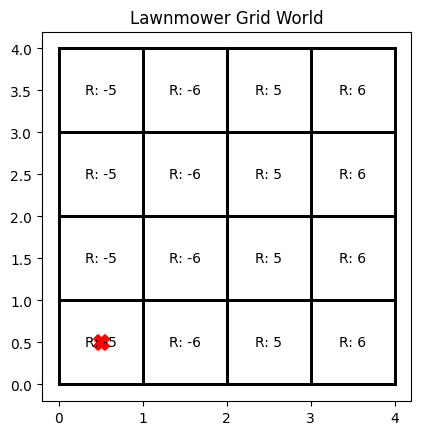

Step 2
Current State: (0, 0)
Chosen Action: 2 (Up, Down, Right, Left)
Reward: -6
Grid World Visualization:


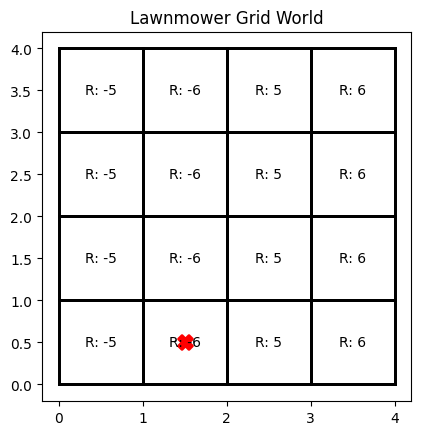

Step 3
Current State: (0, 1)
Chosen Action: 0 (Up, Down, Right, Left)
Reward: -6
Grid World Visualization:


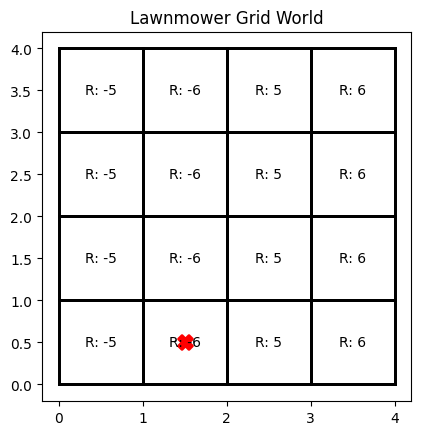

Step 4
Current State: (0, 1)
Chosen Action: 0 (Up, Down, Right, Left)
Reward: -6
Grid World Visualization:


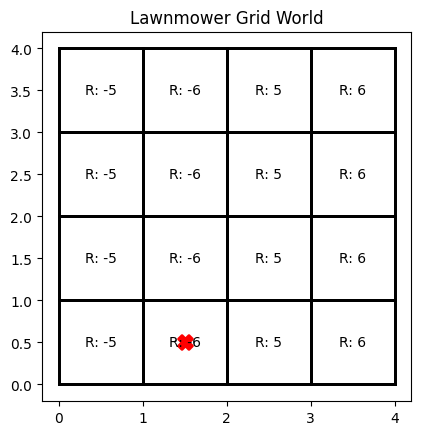

Step 5
Current State: (0, 1)
Chosen Action: 1 (Up, Down, Right, Left)
Reward: -6
Grid World Visualization:


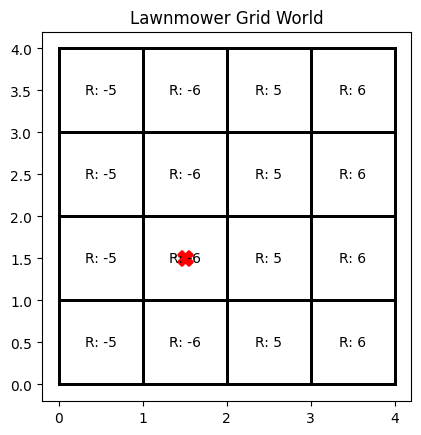

Step 6
Current State: (1, 1)
Chosen Action: 1 (Up, Down, Right, Left)
Reward: -6
Grid World Visualization:


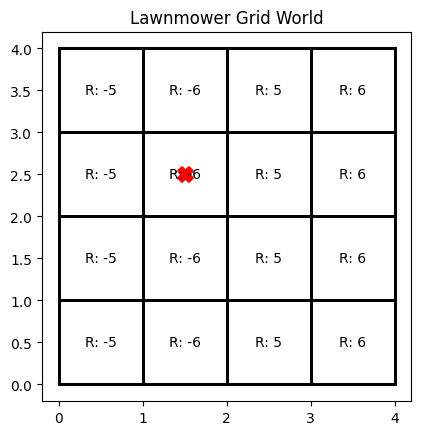

Step 7
Current State: (2, 1)
Chosen Action: 1 (Up, Down, Right, Left)
Reward: -6
Grid World Visualization:


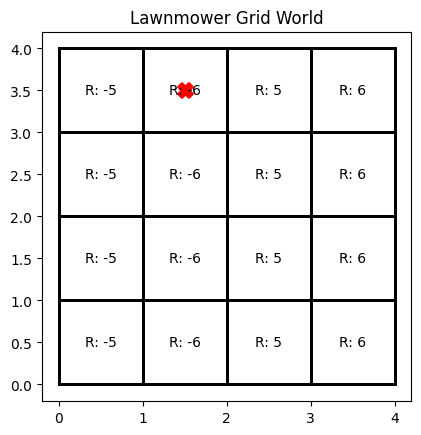

Step 8
Current State: (3, 1)
Chosen Action: 1 (Up, Down, Right, Left)
Reward: -6
Grid World Visualization:


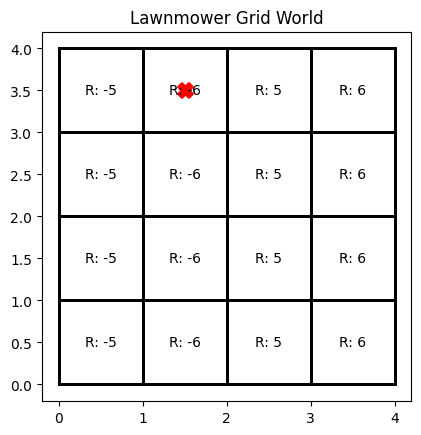

Step 9
Current State: (3, 1)
Chosen Action: 2 (Up, Down, Right, Left)
Reward: 5
Grid World Visualization:


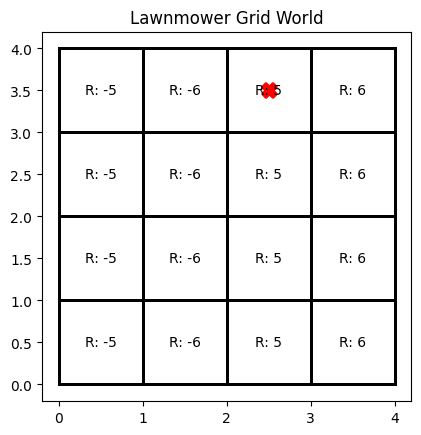

Step 10
Current State: (3, 2)
Chosen Action: 1 (Up, Down, Right, Left)
Reward: 5
Grid World Visualization:


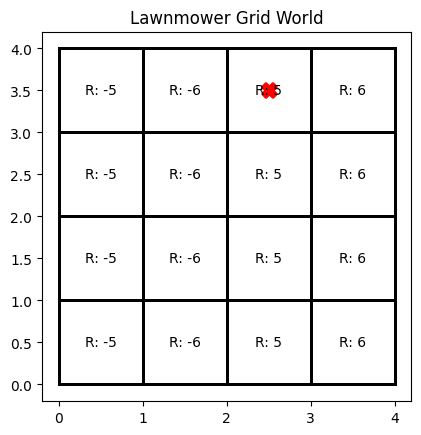

Step 11
Current State: (3, 2)
Chosen Action: 2 (Up, Down, Right, Left)
Reward: 6
Grid World Visualization:


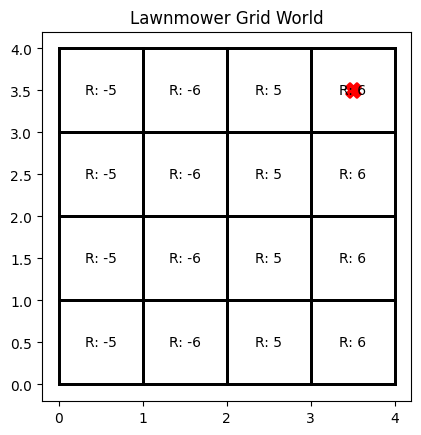

Episode finished after 11 timesteps


In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as patches
import gym
from gym import spaces
from itertools import product

class LawnmoverEnv:#here lket us do intilaiation for the lawnmover environment
    def __init__(self, grid_size=4):
        self.grid_size = grid_size
        self.states = [(i, j) for i in range(self.grid_size) for j in range(self.grid_size)]
        self.actions = [0, 1, 2, 3]
        self.rewards = {
            (0, 0): -5,
            (0, 1): -6,
            (0, 2): +5,
            (0, 3): +6,
            (1, 0): -5,
            (1, 1): -6,
            (1, 2): +5,
            (1, 3): +6,
            (2, 0): -5,
            (2, 1): -6,
            (2, 2): +5,
            (2, 3): +6,
            (3, 0): -5,
            (3, 1): -6,
            (3, 2): +5,
            (3, 3): +6
        }
        self.state = self.states[0] #here 0 reppresents intial state
#above we have taken 0 to represent initial state
    def step(self, action):
        j=self.state[0]
        k=self.state[1]
        m=self.grid_size
        # here we are updating the state based upon the chosen action
        if action == 0:  # Up
            self.state = (max(0, j - 1), k)
        elif action == 1:  # Down
            self.state = (min(m- 1, j + 1), k)
        elif action == 2:  # Right
            self.state = (j, min(m - 1, k + 1))
        elif action == 3:  # Left
            self.state = (j, max(0, k - 1))
        done = True if self.state == (m - 1, m - 1) else False
        reward = self.rewards[self.state] if done else self.rewards.get(self.state, 0)
        return self.state, reward, done, {}


    def reset(self):
        z=self.states[0]
        self.state = z
        return self.state

    def render(self):
        b=self.grid_size #here we will be visualising using matplotlib
        fig, ax = plt.subplots()
        for i in range(b + 1):
            ax.plot([i, i], [0, b], color='black', lw=2)
            ax.plot([0, b], [i, i], color='black', lw=2)
        for i in range(b):
            for j in range(b):
                cell = (i, j)

                reward = self.rewards.get(cell, 0)
                rectangle = patches.Rectangle((j, i), 1, 1, linewidth=2, edgecolor='black', facecolor='none')
                ax.add_patch(rectangle)
                ax.text(j + 0.5, i + 0.5, f"R: {reward}", color='black',fontsize=10, ha='center', va='center')

        current_state = np.array(self.state)
        ax.scatter(current_state[1] + 0.5, current_state[0] + 0.5, color='red', marker='X', s=100, linewidths=2)
        ax.set_aspect('equal', adjustable='box')

        plt.title('Lawnmower Grid World')
        plt.show()


class RandomAgent:
    def __init__(self, actions):
        self.actions = actions

    def choose_action(self):
        return random.choice(self.actions)

def running(env, agent, num_timesteps=10):
    for i in range(12):
        current_state = env.state
        action = agent.choose_action()
        next_state, reward, done, _ = env.step(action)

        print(f"Step {i + 1}")
        print(f"Current State: {current_state}")
        print(f"Chosen Action: {action} (Up, Down, Right, Left)")
        print(f"Reward: {reward}")
        print("Grid World Visualization:")
        env.render()

        if done:
            print(f"Episode finished after {i + 1} timesteps")
            break

env = LawnmoverEnv()
agent = RandomAgent(env.actions)
running(env, agent)




In [ ]:
#PART 2

In [ ]:
#BASE CODE


Initial q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

 trained q-table:
[[-4.00729043 -5.92571738 -5.75011239 -2.02730893]
 [-4.71094692 -4.19861888  2.53201011 -4.86518048]
 [ 1.73655169  3.02332637  5.25466639 -2.51931446]
 [ 3.37250423  5.58367713  5.06733765  3.2047327 ]
 [-3.4971996  -6.2160635  -4.5371079  -4.99060918]
 [-3.08419457 -3.96908725  4.8141218  -5.51550613]
 [ 3.09469833  2.02874193  6.20447883 -3.85453957]
 [ 4.66194645  5.85889661  6.39868837  3.7501746 ]
 [-4.84992257 -4.16102988 -6.6315501  -6.11026996]
 [-5.2077988  -3.23417716  3.92329606 -5.22734734]
 [ 2.34379818  2.75011802  5.85571245 -4.76582669]
 [ 4.44141628  2.0634      5.98378734  4.80105201]
 [-3.81825857 -2.3056123  -4.2964568  -3.28637578]
 [-2.9309036  -4.48715202  2.47389072 -2.72290073]
 [ 1.8603

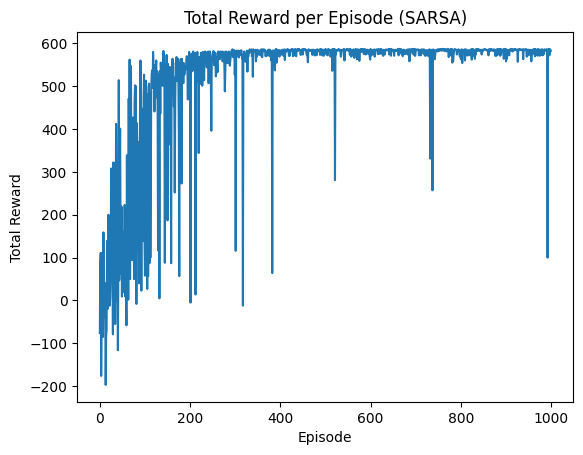

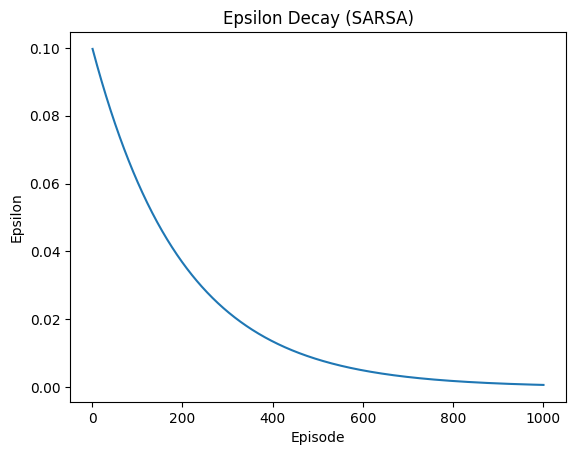

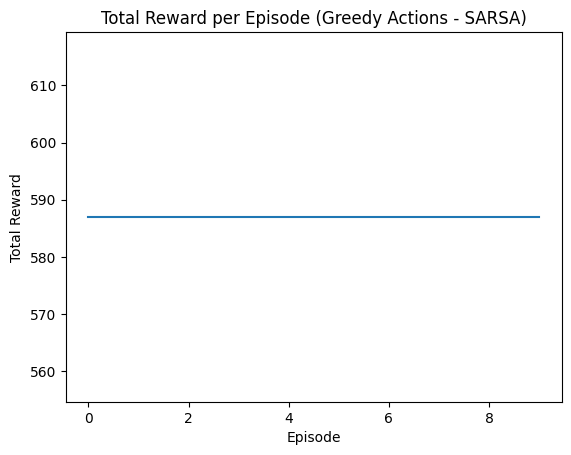

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

class SARSALearning:
    def __init__(self, env, alpha=0.1, gamma=0.9, epsilon=1.0, epsilon_decay=0.995, epsilon_min=0.1):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min
        a = len(env.states)
        b = len(env.actions)
        self.q_table = np.zeros((a, b))

    def choose_action(self, state):
        if random.uniform(0, 1) < self.epsilon:
            return random.choice(self.env.actions)
        else:
            state_index = self.env.states.index(state)
            return np.argmax(self.q_table[state_index, :])

    def update_q_table(self, state, action, reward, next_state, next_action):
        state_index = self.env.states.index(state)
        next_state_index = self.env.states.index(next_state)

        current_q = self.q_table[state_index, action]
        next_q = self.q_table[next_state_index, next_action]
        updated_q = current_q + self.alpha * (reward + self.gamma * next_q - current_q)
        self.q_table[state_index, action] = updated_q

    def train(self, num_episodes=1000, max_timesteps=100):
        total_rewards = []

        for i in range(num_episodes):
            state = self.env.reset()
            action = self.choose_action(state)
            reward_episode = 0

            for i in range(max_timesteps):
                next_state, reward, done, i = self.env.step(action)
                next_action = self.choose_action(next_state)
                self.update_q_table(state, action, reward, next_state, next_action)

                reward_episode =reward_episode+ reward
                state = next_state
                action = next_action

                if done:
                    break

            total_rewards.append(reward_episode)

            # Decay epsilon
            if self.epsilon > self.epsilon_min:
                self.epsilon *= self.epsilon_decay

        return total_rewards

    def evaluate_greedy(self, num_episodes=10, max_timesteps=100):
        total_rewards = []

        for i in range(num_episodes):
            state = self.env.reset()
            reward_episode = 0

            for i  in range(max_timesteps):
                action = np.argmax(self.q_table[self.env.states.index(state), :])
                next_state, reward, done, i = self.env.step(action)

                reward_episode =reward_episode+ reward
                state = next_state

                if done:
                    break

            total_rewards.append(reward_episode)

        return total_rewards

def q_tables(agent):
    print("Initial q-table:")
    print(agent.q_table)

    # Train the agent for a small number of episodes
    agent.train(num_episodes=10, max_timesteps=100)

    print("\n trained q-table:")
    print(agent.q_table)

def plot_results(total_rewards, label):
    plt.plot(total_rewards)
    plt.title(label)
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.show()

def plot_epsilon_decay(agent, num_episodes):
    epsilon_values = [agent.epsilon * (agent.epsilon_decay ** episode) for episode in range(num_episodes)]

    plt.plot(range(num_episodes), epsilon_values)
    plt.title('Epsilon Decay')
    plt.xlabel('Episode')
    plt.ylabel('Epsilon Value')
    plt.show()

def run_greedy_policy(agent, env, num_episodes=10):
    greedy_rewards = []

    for i in range(num_episodes):
        state = env.reset()
        reward_per_epi = 0

        while True:
            action = agent.choose_action(state)
            next_state, reward, done, i = env.step(action)

            reward_per_epi += reward
            state = next_state

            if done:
                greedy_rewards.append(reward_per_epi)
                break

env = LawnmoverEnv()

# Initialize SARSA agent
sarsa_agent = SARSALearning(env)
q_tables(sarsa_agent)
# Train the SARSA agent
sarsa_rewards = sarsa_agent.train()

# Evaluate total rewards for greedy actions
sarsa_greedy_rewards = sarsa_agent.evaluate_greedy()

# Plot total reward per episode for SARSA
plt.plot(sarsa_rewards)
plt.title('Total Reward per Episode (SARSA)')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.show()

# Plot epsilon decay for SARSA
h=len(sarsa_rewards)
episodes = range(1, h + 1)
epsilon_values = [sarsa_agent.epsilon * (sarsa_agent.epsilon_decay ** (episode - 1)) for episode in episodes]

plt.plot(episodes, epsilon_values)
plt.title('Epsilon Decay (SARSA)')
plt.xlabel('Episode')
plt.ylabel('Epsilon')
plt.show()

# Plot total reward per episode for greedy actions in SARSA
plt.plot(sarsa_greedy_rewards)
plt.title('Total Reward per Episode (Greedy Actions - SARSA)')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.show()


In [ ]:
#HYPERPARAMETERTUNING



Initial Q-table for Gamma=0.4, Epsilon Decay=0.995:
Initial q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

 trained q-table:
[[-5.97743251 -5.46715244 -4.51787147 -5.44097549]
 [-4.27255463 -3.64340869  4.06711686 -4.02551378]
 [ 2.49006404  3.01629346  3.8828567  -4.12256995]
 [ 3.23066353  3.84719491  2.33464183  2.4313547 ]
 [-5.16525352 -4.83287646 -3.96792281 -2.9879993 ]
 [-4.36216798 -3.05112741  3.82432646 -3.14571543]
 [ 2.51650577  3.24617933  3.7371896  -4.34519429]
 [ 2.67706331  2.1157376   2.60212031  3.16562749]
 [-4.19191565 -4.15260191 -4.5701744  -2.69196521]
 [-3.25579848 -2.54739958  2.20771003 -3.5474869 ]
 [ 1.8010984   0.974       3.00730631 -3.53665154]
 [ 1.77294149  2.0634      2.60242542  1.21195126]
 [-3.92280695 -1.53375222 -2.70771381 -3.74356988]
 [-1.08

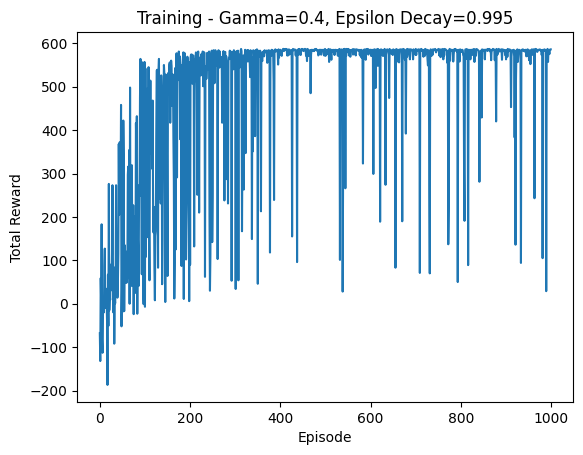

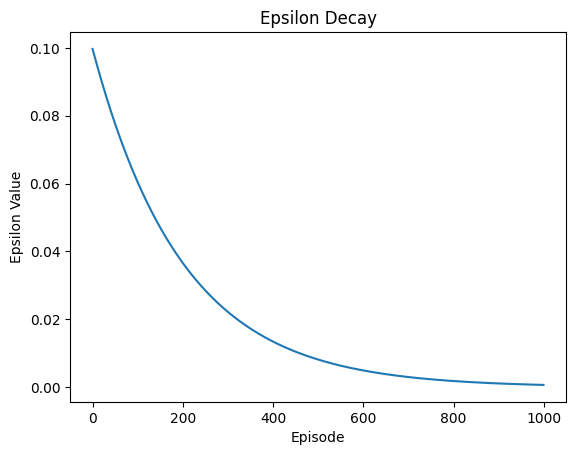

Gamma's greedy rewards=0.4, Epsilon Decay=0.995


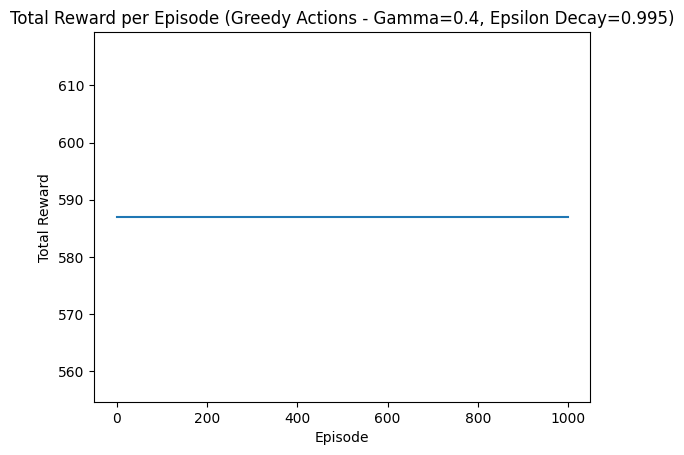


Initial Q-table for Gamma=0.4, Epsilon Decay=0.99:
Initial q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

 trained q-table:
[[-5.65981322 -5.67405762 -6.10966208 -6.23178837]
 [-4.87499549 -5.14390453  3.89773761 -5.73297515]
 [ 3.43431874  3.29630131  4.9241622  -5.53503665]
 [ 5.61835998  5.78428869  6.63790895  2.76357841]
 [-4.73338499 -4.96770043 -4.57002861 -4.38335393]
 [-4.380298   -4.5209216   3.96788937 -3.29234238]
 [ 3.98035563  3.62155699  5.09272033 -2.79179765]
 [ 5.64008116  4.79688301  3.9762016   3.81141029]
 [-4.02405086 -3.89469536 -3.27326285 -4.4148736 ]
 [-4.26089682 -3.33559855  4.43861566 -1.8354403 ]
 [ 4.55580124  2.13958574  2.65682982 -3.67019583]
 [ 4.05344446  2.45706     0.624       2.0364807 ]
 [-3.36734951 -3.78138099 -4.08396255 -3.19459598]
 [-3.108

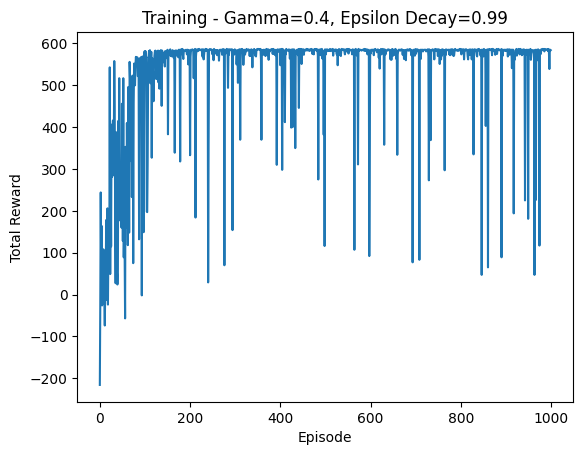

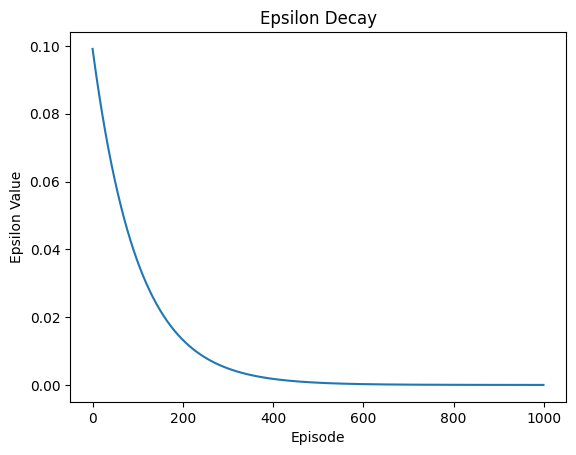

Gamma's greedy rewards=0.4, Epsilon Decay=0.99


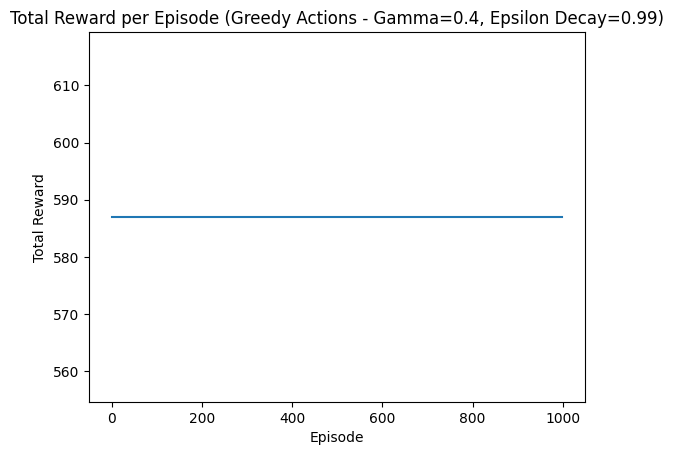


Initial Q-table for Gamma=0.4, Epsilon Decay=0.98:
Initial q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

 trained q-table:
[[-5.27282565 -5.24337547 -4.5058817  -5.54642044]
 [-4.83840606 -5.42025974  5.72104601 -4.83949519]
 [ 4.42900742  4.05928903  7.28187344 -5.52419541]
 [ 6.46743672  7.37415832  6.61048454  3.9871178 ]
 [-4.96365912 -4.23194904 -4.55984911 -4.90336382]
 [-5.20673866 -4.03016074  4.36736147 -4.84217259]
 [ 4.89505339  3.71073378  4.88311618 -4.81109374]
 [ 7.16239416  4.35293587  5.37349407  3.67410621]
 [-3.06370538 -2.93884755 -4.53292679 -3.5215254 ]
 [-4.81638982 -3.89841152  3.13440014 -2.65119226]
 [ 3.92502651  2.58543317  2.71762084 -3.8351802 ]
 [ 0.84498059  2.0634      1.15888278  3.16535761]
 [-2.69538349 -4.05112713 -2.81622236 -3.50137618]
 [-4.212

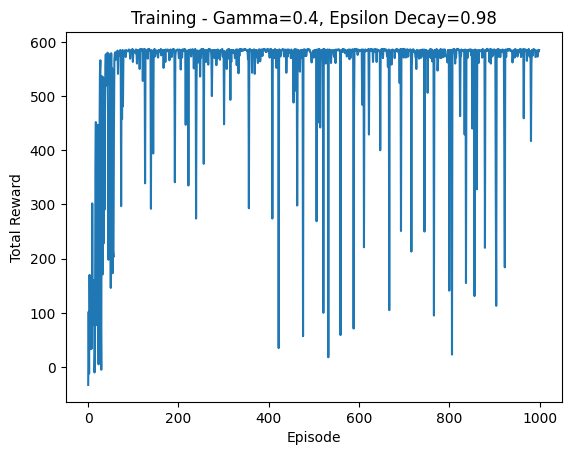

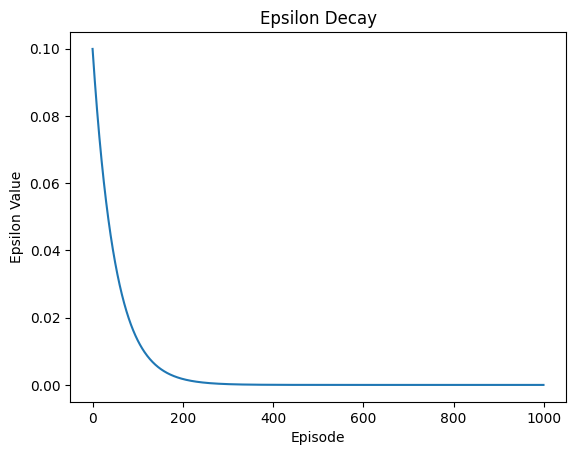

Gamma's greedy rewards=0.4, Epsilon Decay=0.98


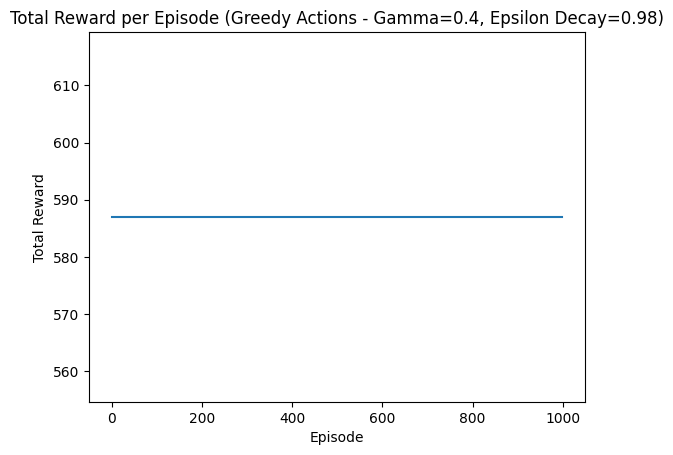


Initial Q-table for Gamma=0.6, Epsilon Decay=0.995:
Initial q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

 trained q-table:
[[-4.72892466 -5.1226907  -5.30800055 -4.33246828]
 [-3.31998937 -4.31478207  3.10834844 -4.37946472]
 [ 2.72152764  2.49748827  4.12478499 -3.92909645]
 [ 3.01051117  4.21360651  2.33085748  2.12651856]
 [-3.17586838 -5.83598455 -3.58646237 -4.28315453]
 [-2.91959646 -5.04455756  3.53568399 -3.05668738]
 [ 3.42117839  2.3377476   3.1934175  -4.24062314]
 [ 1.82286788  3.26130605  4.92807376  3.452137  ]
 [-4.98476703 -3.28756975 -4.87742703 -5.04154041]
 [-4.56141133 -3.30389129  3.24352666 -3.82407272]
 [ 2.50075579  2.36148163  1.25947217 -2.91409378]
 [ 2.5749802   1.14        0.68345262  1.54770813]
 [-2.99712786 -4.93541455 -3.01461294 -3.20968686]
 [-2.51

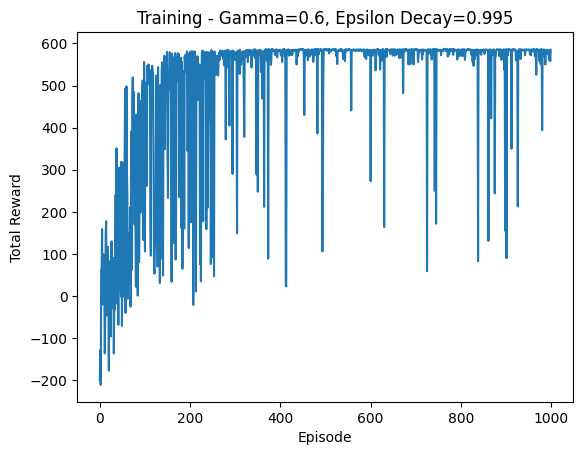

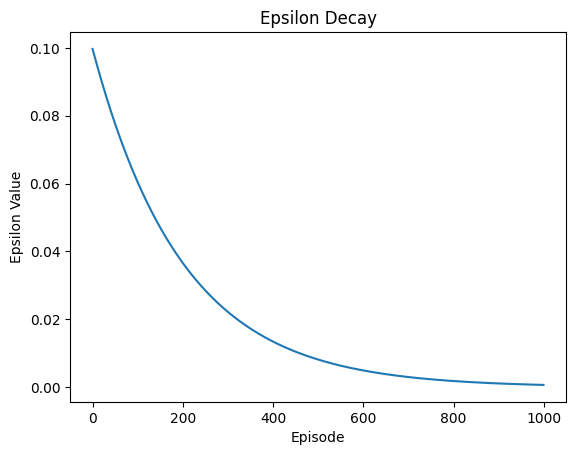

Gamma's greedy rewards=0.6, Epsilon Decay=0.995


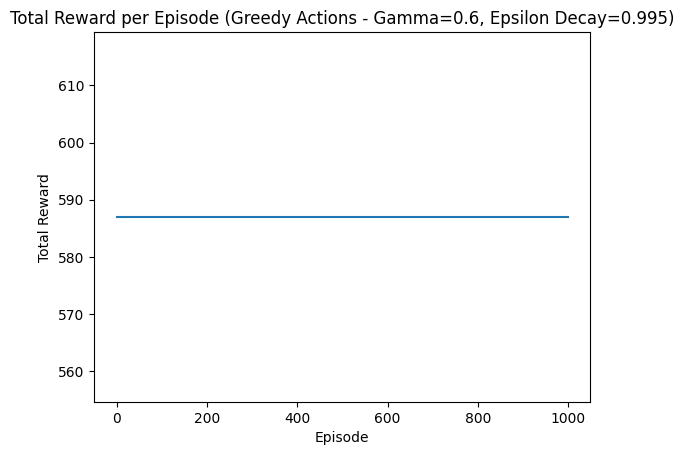


Initial Q-table for Gamma=0.6, Epsilon Decay=0.99:
Initial q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

 trained q-table:
[[-5.04385843 -4.76290192 -4.19951688 -3.3366187 ]
 [-2.34117817 -2.90398444  4.13655909 -3.56100615]
 [ 4.4482693   3.83442285  6.80574874 -3.71901198]
 [ 7.15757448  4.05301921  6.85518905  4.30174854]
 [-3.19743051 -3.71385711 -3.84102892 -3.59300522]
 [-2.65080556 -3.41741845  4.07459867 -2.14601899]
 [ 5.31889173  2.19855036  4.48389202 -2.91703918]
 [ 2.10938246  3.84112536  3.61783249  3.93148155]
 [-3.31627829 -3.83549354 -2.36201035 -3.18053403]
 [-2.27400624 -3.22561159  2.70203026 -1.59515765]
 [ 2.16557618  2.83263088  1.90389123 -2.13777492]
 [ 1.95003777  1.626       3.8439084   2.14119545]
 [-3.92394436 -3.68958565 -3.84160634 -3.59256061]
 [-1.657

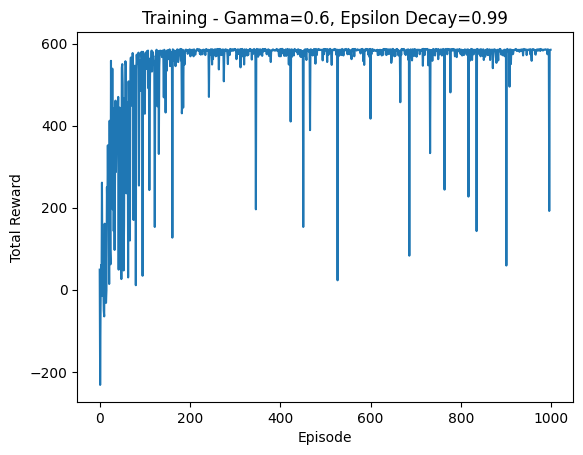

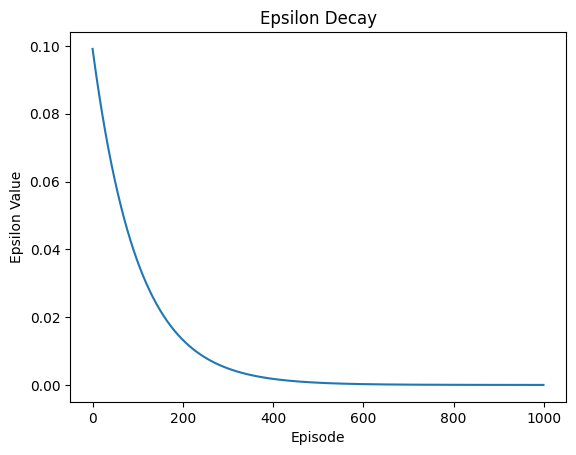

Gamma's greedy rewards=0.6, Epsilon Decay=0.99


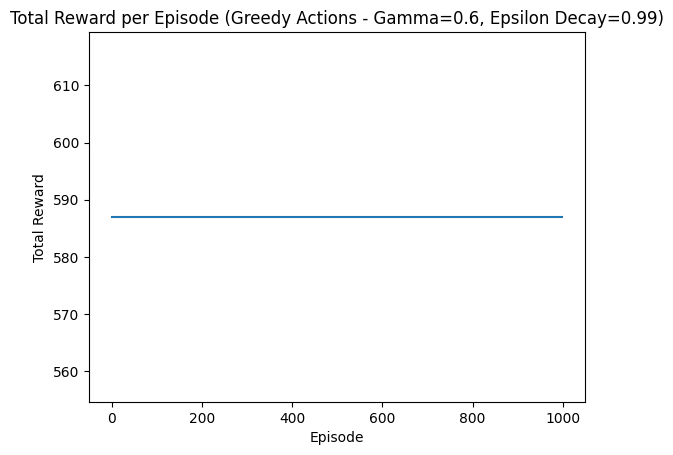


Initial Q-table for Gamma=0.6, Epsilon Decay=0.98:
Initial q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

 trained q-table:
[[-5.80944161 -5.38932837 -5.82965202 -6.90854339]
 [-4.72375063 -4.32233451  3.67266169 -5.49258033]
 [ 1.43087797  2.27365305  3.08145717 -4.31150345]
 [ 1.176       4.69694389  2.48666096  0.99544538]
 [-5.30816718 -3.27408766 -3.32513493 -3.82177272]
 [-4.44919028 -2.26620624  3.532928   -1.9531228 ]
 [ 1.92241754  2.14756075  2.69047835 -2.80329867]
 [ 3.53136761  4.65824755  1.87540265  1.12225534]
 [-3.76943727 -4.27111792 -2.84936165 -4.16822249]
 [-2.04447765 -2.84126696  2.58275556 -3.12826439]
 [ 0.63736522  2.75810449  4.93328231 -2.17529225]
 [ 3.06115728  2.811354    4.05584535  3.86030665]
 [-4.04582564 -4.23432694 -3.85997631 -5.18620146]
 [-3.098

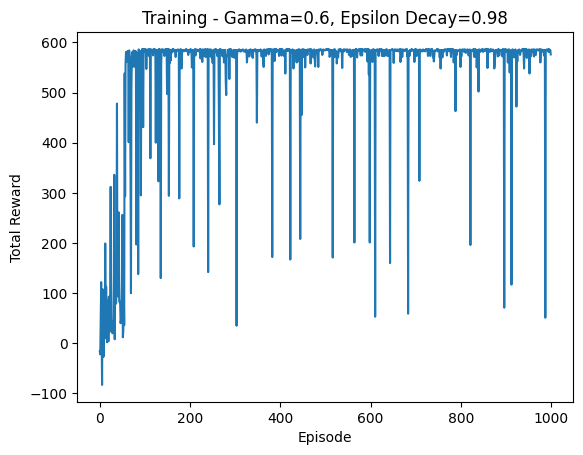

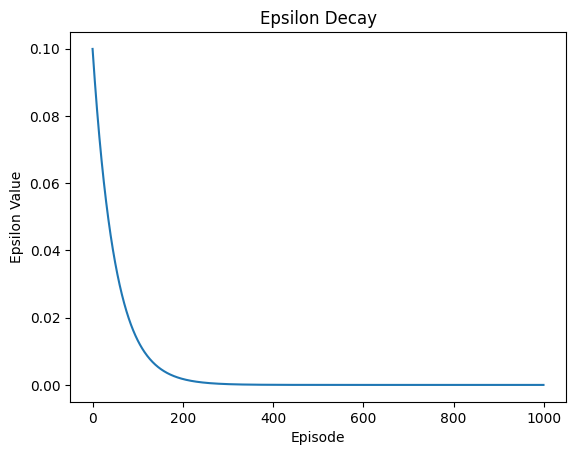

Gamma's greedy rewards=0.6, Epsilon Decay=0.98


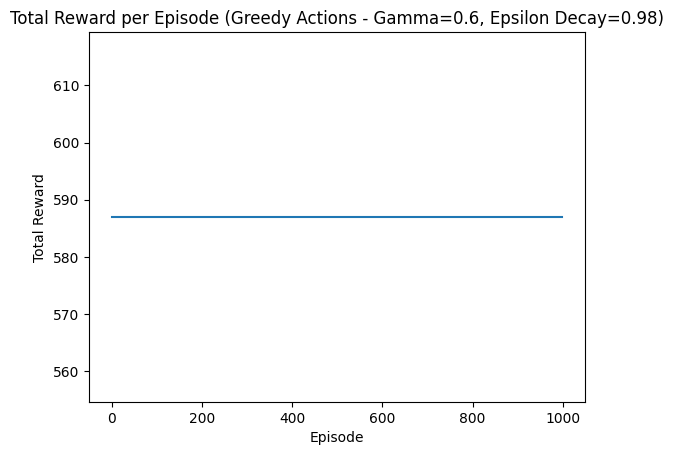


Initial Q-table for Gamma=0.7, Epsilon Decay=0.995:
Initial q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

 trained q-table:
[[-7.5311962  -7.04286254 -6.62655958 -7.6060064 ]
 [-8.3900848  -6.19912902  5.41063653 -6.54766263]
 [ 5.66771004  3.68040264  4.67599692 -4.89795418]
 [ 3.00804753  4.14203552  0.669146    3.80408732]
 [-5.86171713 -5.08572624 -6.74612903 -4.27374327]
 [-6.00545808 -5.2273793   3.15957483 -4.21080436]
 [ 3.58015328  3.40501799  3.40424115 -5.35252375]
 [ 3.41248798  5.11144478  4.6009571   2.14899694]
 [-3.58697605 -3.96590358 -4.12927219 -3.43141146]
 [-5.32469156 -2.74127934  3.35102929 -2.1580242 ]
 [ 3.19949338  1.77539883  5.20001118 -1.27639968]
 [ 4.55113942  2.45706     4.67539184  3.66500572]
 [-4.01409776 -2.59916785 -2.37218133 -3.18466831]
 [-3.10

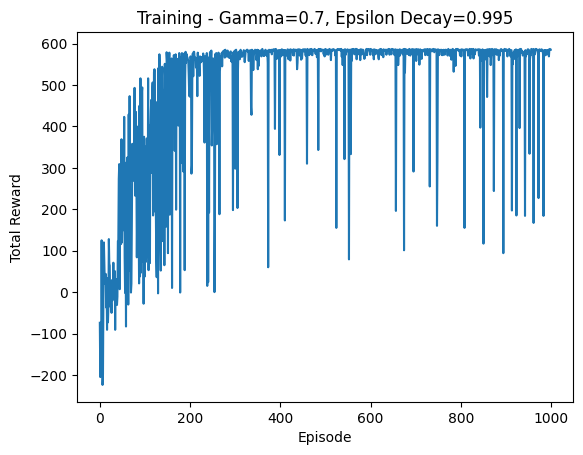

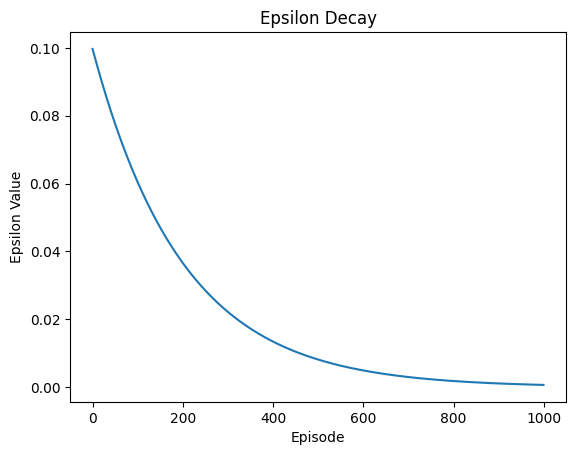

Gamma's greedy rewards=0.7, Epsilon Decay=0.995


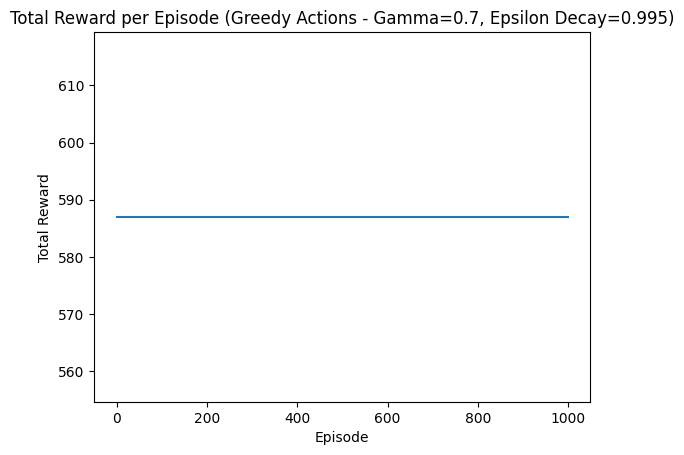


Initial Q-table for Gamma=0.7, Epsilon Decay=0.99:
Initial q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

 trained q-table:
[[-4.08518393 -4.80045361 -3.14242291 -5.03171442]
 [-0.74456104 -1.06012833  3.96146337 -3.00345089]
 [ 2.99529852  3.1052679   6.30142289 -2.17904691]
 [ 6.80227756  5.41911527  8.39424895  4.1506003 ]
 [-4.21742652 -2.46311685 -3.77179299 -4.03496378]
 [-1.96480181 -2.47175249  2.10867847 -2.67347971]
 [ 3.07713831  2.7047123   2.01435501 -2.99590718]
 [ 4.53178273  3.47996994  3.69133361  3.38675753]
 [-1.1175847  -1.7877228  -3.15259449 -3.58596158]
 [-1.76860927 -2.13466637  2.86136844 -1.9269604 ]
 [ 1.4367898   2.2501622   3.22317972 -1.55977087]
 [ 3.65528692  2.45706     2.47724326  1.1147548 ]
 [-1.97351259 -1.49069623 -1.15344    -1.52126489]
 [-1.136

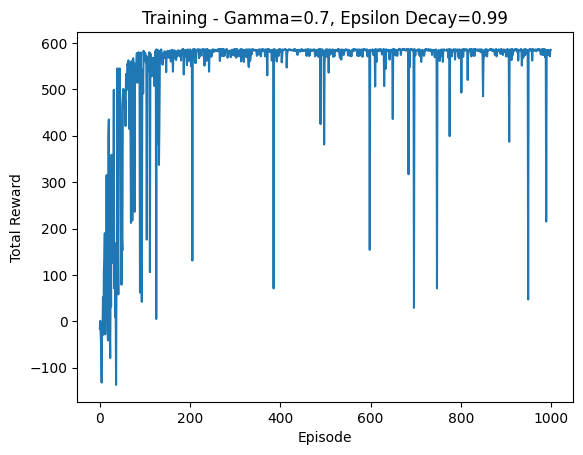

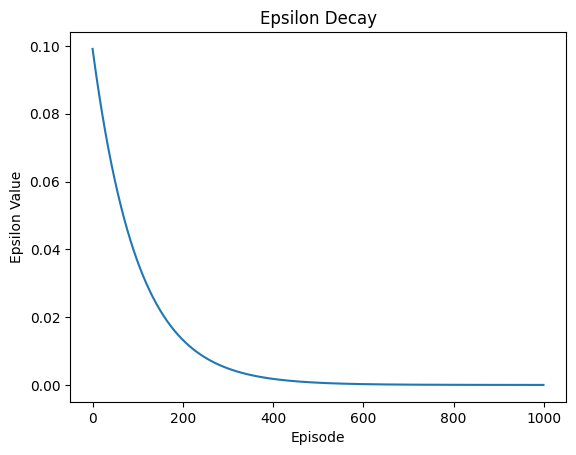

Gamma's greedy rewards=0.7, Epsilon Decay=0.99


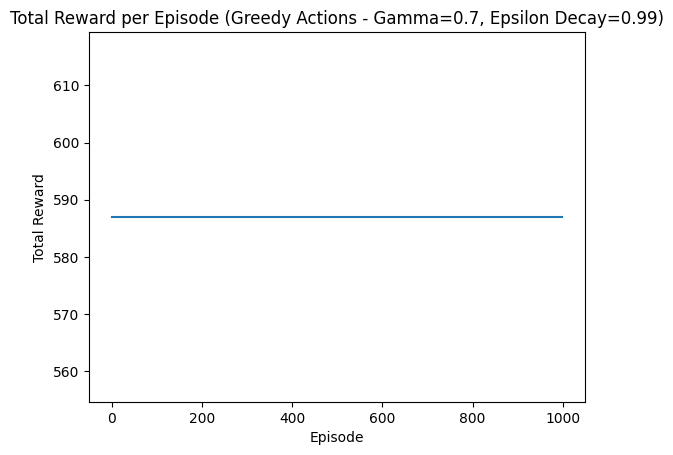


Initial Q-table for Gamma=0.7, Epsilon Decay=0.98:
Initial q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

 trained q-table:
[[-4.74603648 -4.58200787 -5.92652251 -5.34336593]
 [-4.23362711 -6.00737044  4.13122251 -3.80553752]
 [ 2.3071026   1.6806387   4.22934619 -3.99203776]
 [ 0.73649275  4.72481969  3.09477639  1.77763277]
 [-4.76737282 -3.93431862 -3.37500877 -3.32947719]
 [-4.93614032 -4.3273729   4.02754326 -2.47464906]
 [ 2.16327115  1.7567139   5.06440722 -3.98930577]
 [ 2.55644295  3.33347718  5.63921791  3.39851492]
 [-3.87850489 -5.3721133  -4.24883952 -3.66217302]
 [-3.36948735 -4.24366479  2.67959618 -4.48744256]
 [ 1.37507643  1.94425654  0.744438   -2.59293147]
 [ 1.53238231  2.45706     0.6451458   0.59090768]
 [-5.27589105 -4.84220104 -4.49792332 -5.64304336]
 [-3.762

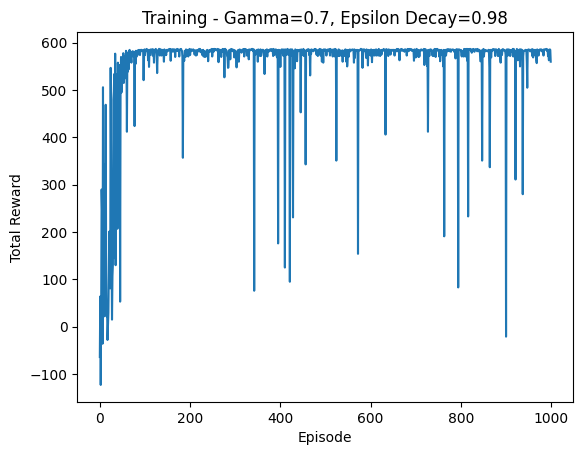

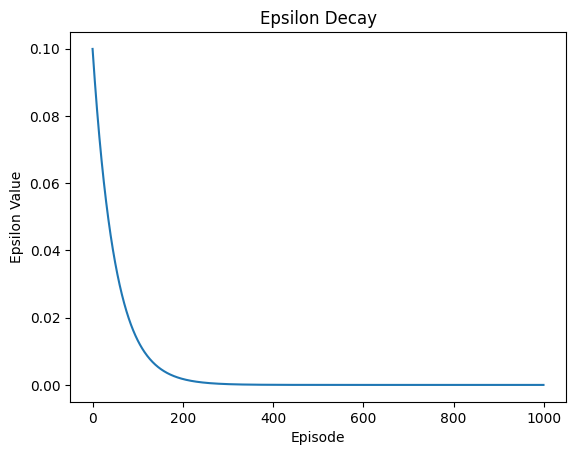

Gamma's greedy rewards=0.7, Epsilon Decay=0.98


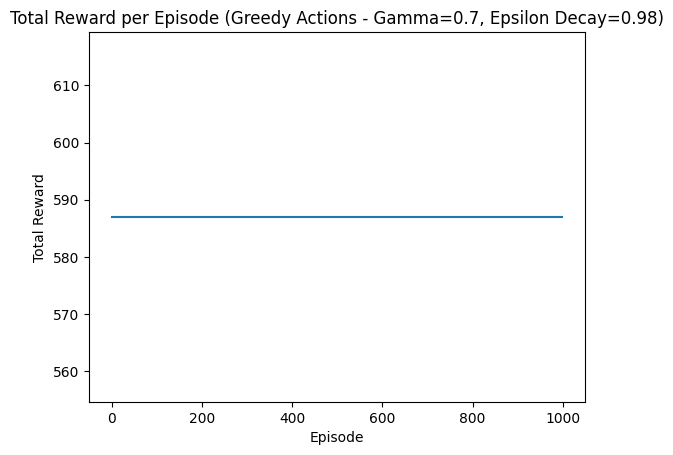

In [ ]:
def hyperparametertuning_sarsa(env, gamma_values, epsilon_decay_values):
    alpha = 0.1  #here the alpha value is the constant learning rate through which our model learns
#hyperparametertuning looping for both the gamma and epsilon decay values
    for i in gamma_values:
        for j in epsilon_decay_values:
            sarsa_agent = SARSALearning(env, alpha=alpha, gamma=i, epsilon_decay=j)

            # here we are printining intiial q table for hyperparameters
            print(f"\nInitial Q-table for Gamma={i}, Epsilon Decay={j}:")
            q_tables(sarsa_agent)

            # here we will train our model and plot the total rewards per episode
            total_rewards = sarsa_agent.train(num_episodes=1000, max_timesteps=100)
            plot_results(total_rewards, f"Training - Gamma={i}, Epsilon Decay={j}")

            # epsilon decay graph
            plot_epsilon_decay(sarsa_agent, num_episodes=1000)

            # run the lawnmover for sarsa and plot greedy actions
            run_greedy_policy(sarsa_agent, env, num_episodes=1000)
            greedy_rewards = sarsa_agent.evaluate_greedy(num_episodes=1000)
            print(f"Gamma's greedy rewards={i}, Epsilon Decay={j}")

            # here we will plot total reward per episodes for greedy actions as per the question
            plt.plot(greedy_rewards)
            plt.title(f'Total Reward per Episode (Greedy Actions - Gamma={i}, Epsilon Decay={j})')
            plt.xlabel('Episode')
            plt.ylabel('Total Reward')
            plt.show()

# Hyperparameter tuning values for SARSA
gamma_values_sarsa = [0.4, 0.6, 0.7]
epsilon_decay_values_sarsa = [0.995, 0.99, 0.98]

# here we are printing and plot results for each set of hyperparameters
hyperparametertuning_sarsa(env, gamma_values_sarsa, epsilon_decay_values_sarsa)


In [ ]:
#PART 3
#BASE CODE


Initial Q-tables:
Q1:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Q2:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Trained Q-tables:
Q1:
[[34.36691124 29.80255289 47.1        36.8629107 ]
 [45.57104311 46.61702801 59.         36.7493773 ]
 [58.99988332 58.99758805 60.         47.09991931]
 [60.         60.         60.         59.        ]
 [21.07896407 -4.16759629 45.27565562 11.67369293]
 [39.37108189 21.87815574 58.9701686  11.87467462]
 [58.9999232  51.42202906 59.99999983 45.70587703]
 [60.         59.99768352 59.99997272 58.99964803]
 [ 2.5415541  -5.13737693 12.83340753 -5.08998063]
 [ 5.07876

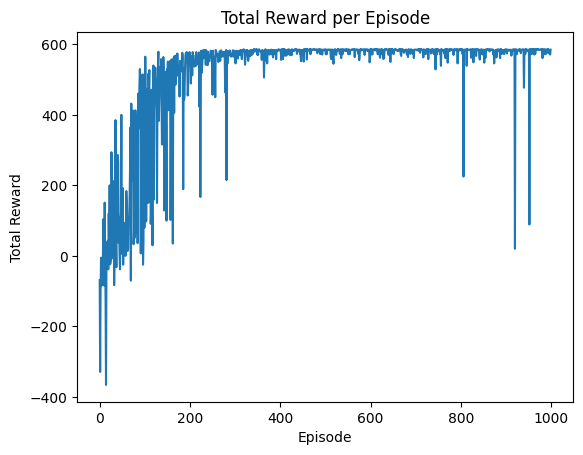

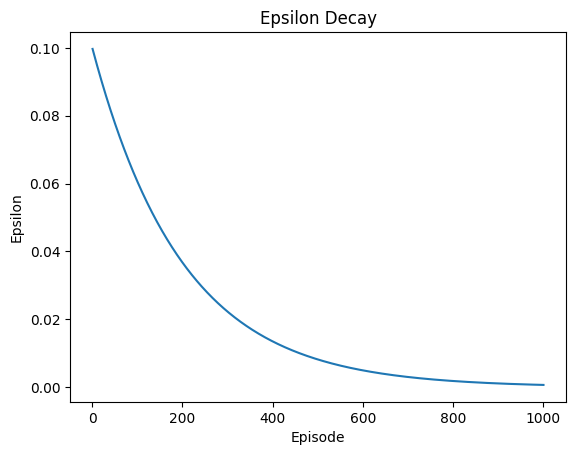

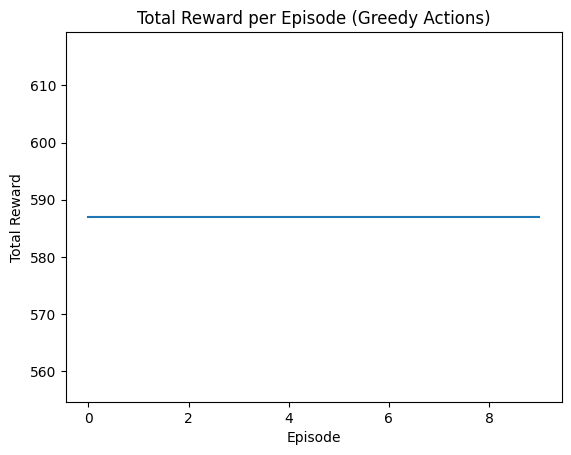

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

class DoubleQLearning:
    def __init__(self, env, alpha=0.1, gamma=0.9, epsilon=1.0, epsilon_decay=0.995, epsilon_min=0.1):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min
        a=len(env.states)
        b=len(env.actions)
        #here we are intialising two q tables since it is a double q learning
        self.q1_table = np.zeros((a, b))
        self.q2_table = np.zeros((a, b))

    def choose_action(self, state):

        if random.uniform(0, 1) < self.epsilon:
            return random.choice(self.env.actions)
        else:
            state_index = self.env.states.index(state)
            total_q = self.q1_table[state_index, :] + self.q2_table[state_index, :]
            return np.argmax(total_q)


    def update_q_tables(self, state, action, reward, next_state):
        state_index = self.env.states.index(state)
        next_state_index = self.env.states.index(next_state)
        y=True
        z=False
        if random.choice([y, z]):
            max_next_action = np.argmax(self.q1_table[next_state_index, :])
            self.q1_table[state_index, action] += self.alpha * (
                reward + self.gamma * self.q2_table[next_state_index, max_next_action] -
                self.q1_table[state_index, action]
            )
        else:
            max_next_action = np.argmax(self.q2_table[next_state_index, :])
            self.q2_table[state_index, action] += self.alpha * (
                reward + self.gamma * self.q1_table[next_state_index, max_next_action] -
                self.q2_table[state_index, action]
            )

    def train(self, num_episodes=1000, max_timesteps=100):
        total_rewards = []

        for episode in range(num_episodes):
            state = self.env.reset()
            reward_episode = 0

            for i in range(max_timesteps):
                action = self.choose_action(state)
                next_state, reward, done, i = self.env.step(action)
                self.update_q_tables(state, action, reward, next_state)

                reward_episode += reward
                state = next_state

                if done:
                    break

            total_rewards.append(reward_episode)

            # Decay epsilon
            if self.epsilon > self.epsilon_min:
                self.epsilon =self.epsilon *self.epsilon_decay

        return total_rewards

    def evaluate_greedy(self, num_episodes=10, max_timesteps=100):
        total_rewards = []

        for i in range(num_episodes):
            state = self.env.reset()
            reward_episode = 0

            for i in range(max_timesteps):
                action = np.argmax(self.q1_table[self.env.states.index(state), :] +
                                   self.q2_table[self.env.states.index(state), :])
                next_state, reward, done, i = self.env.step(action)

                reward_episode += reward
                state = next_state

                if done:
                    break

            total_rewards.append(reward_episode)

        return total_rewards

agent = DoubleQLearning(env)

initial_q_tables = (agent.q1_table.copy(), agent.q2_table.copy())
trained_rewards = agent.train()
trained_q_tables = (agent.q1_table.copy(), agent.q2_table.copy())

print("Initial Q-tables:")
print("Q1:")
print(initial_q_tables[0])
print("Q2:")
print(initial_q_tables[1])
print("\nTrained Q-tables:")
print("Q1:")
print(trained_q_tables[0])
print("Q2:")
print(trained_q_tables[1])

# Plot total reward per episode
plt.plot(trained_rewards)
plt.title('Total Reward per Episode')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.show()

# Plot epsilon decay
m=len(trained_rewards)
episodes = range(1, m + 1)
epsilon_values = [agent.epsilon * (agent.epsilon_decay ** (episode - 1)) for episode in episodes]

plt.plot(episodes, epsilon_values)
plt.title('Epsilon Decay')
plt.xlabel('Episode')
plt.ylabel('Epsilon')
plt.show()

# Run environment for greedy actions
greedy_rewards = agent.evaluate_greedy()

# Plot total reward per episode for greedy actions
plt.plot(greedy_rewards)
plt.title('Total Reward per Episode (Greedy Actions)')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.show()


DOUBLE Q LEARNING



Initial Q-table for Gamma=0.4, Epsilon Decay=0.995:
Q1:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Q2:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Trained Q-table for Gamma=0.4, Epsilon Decay=0.995:
Q1:
[[-5.97429777 -5.99943539 -2.4        -5.97568315]
 [-2.40542347 -2.45155923  9.         -5.9610063 ]
 [ 8.99999994  8.99999942 10.         -2.40000006]
 [10.         10.         10.          9.        ]
 [-5.33321311 -5.44495426 -2.44173888 -5.70205824]
 [-2.55810722 -2.80343659  8.99975081 -5.93218041]
 [ 8.99115354  8.6919361  10.         -2.54574342]
 [10.          9.9999982   9.99999994  8.99

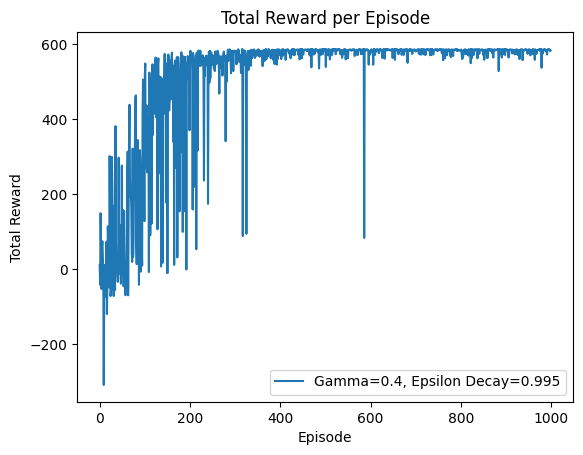

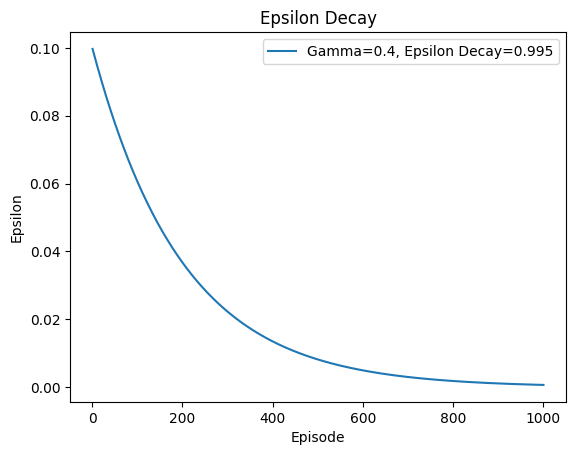

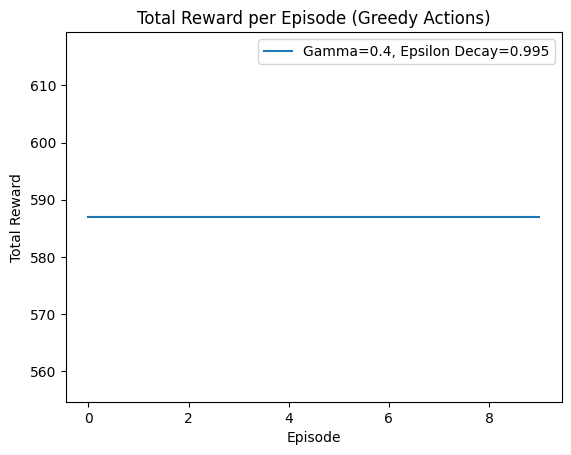


Initial Q-table for Gamma=0.4, Epsilon Decay=0.99:
Q1:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Q2:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Trained Q-table for Gamma=0.4, Epsilon Decay=0.99:
Q1:
[[-5.86815387 -6.09380219 -2.4        -5.95831727]
 [-2.43445063 -2.49697971  9.         -5.94759076]
 [ 8.99962578  8.99844333 10.         -2.40001399]
 [10.         10.         10.          9.        ]
 [-4.34302032 -4.48012635 -2.58758187 -5.77028177]
 [-2.78710355 -3.46340594  8.98735367 -5.33183408]
 [ 8.99994301  8.34488582  9.99999999 -2.74345085]
 [10.          9.4185383   9.99468949  8.9960

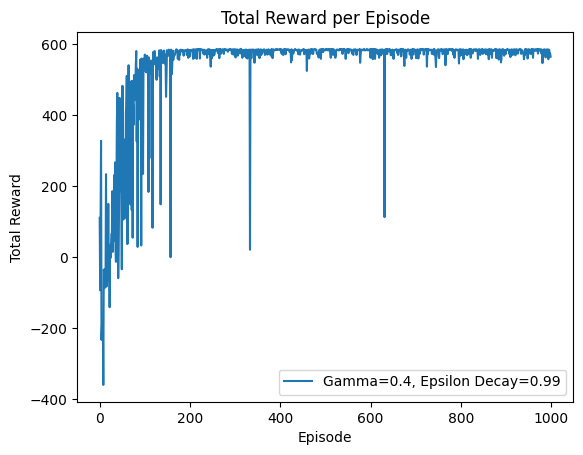

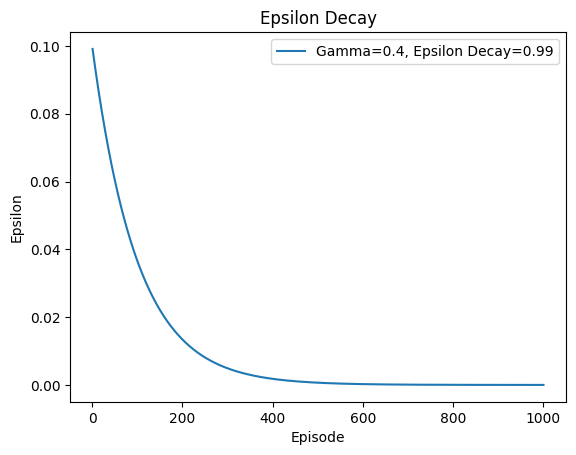

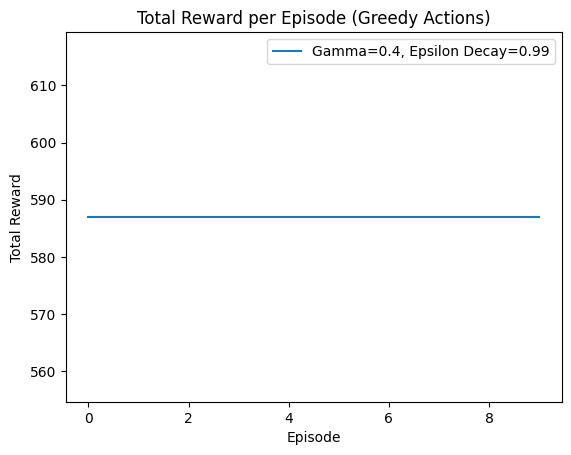


Initial Q-table for Gamma=0.4, Epsilon Decay=0.98:
Q1:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Q2:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Trained Q-table for Gamma=0.4, Epsilon Decay=0.98:
Q1:
[[-5.26799865 -6.5085435  -2.4        -5.93363007]
 [-2.57979438 -2.84384474  9.         -5.5786499 ]
 [ 8.97539798  8.54741507 10.         -2.40586302]
 [10.         10.         10.          9.        ]
 [-2.63549407 -3.41433531 -2.79516879 -3.99485899]
 [-2.65551332 -2.82985663  8.51264942 -3.96729638]
 [ 9.          6.47864562  9.01615039 -3.12395514]
 [10.          9.9999878  10.          8.6   

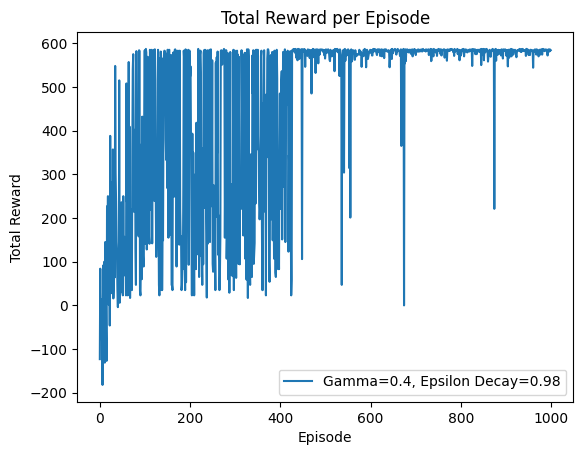

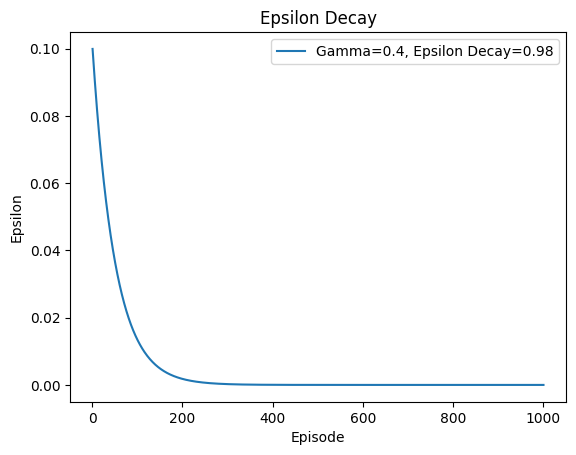

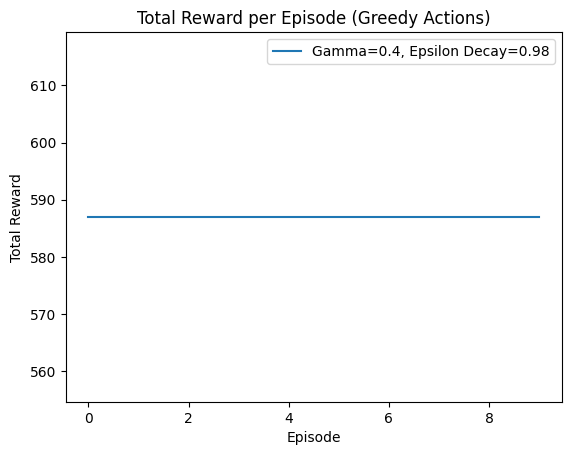


Initial Q-table for Gamma=0.6, Epsilon Decay=0.995:
Q1:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Q2:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Trained Q-table for Gamma=0.6, Epsilon Decay=0.995:
Q1:
[[-3.59922323 -3.80063728  2.4        -3.61407731]
 [ 2.38391489  2.2871332  14.         -3.57355568]
 [13.99999581 13.99999915 15.          2.3999934 ]
 [15.         15.         15.         14.        ]
 [-5.376559   -5.89479304  2.33372884 -4.67994261]
 [ 1.92288115  0.16451441 13.99981825 -4.48392069]
 [13.97694787 13.90563392 15.          2.28277604]
 [15.         14.99999994 14.99999997 13.99

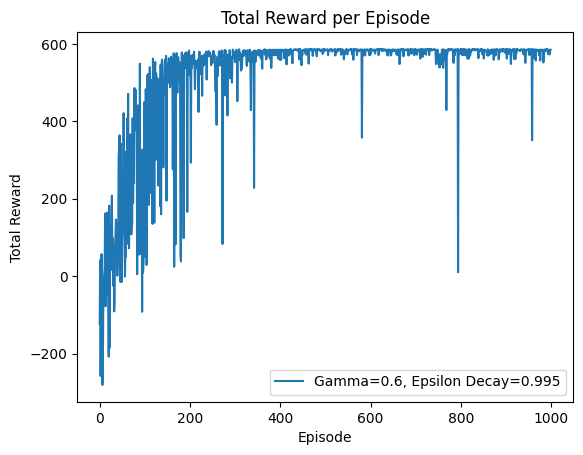

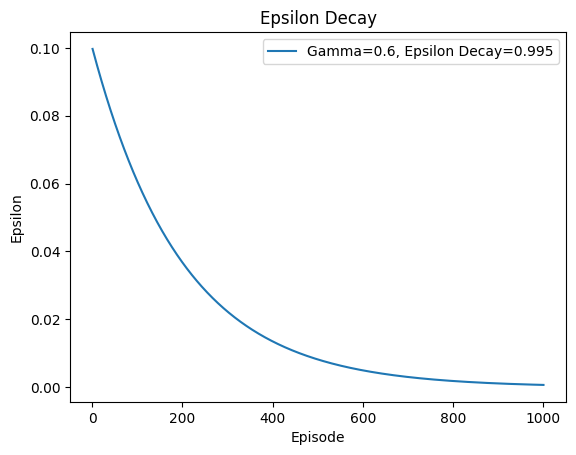

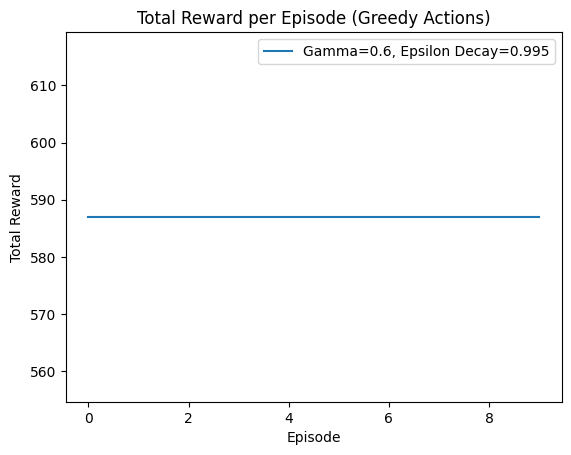


Initial Q-table for Gamma=0.6, Epsilon Decay=0.99:
Q1:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Q2:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Trained Q-table for Gamma=0.6, Epsilon Decay=0.99:
Q1:
[[-3.83596308 -4.91859895  2.4        -3.92043056]
 [ 2.09753228  1.55800158 14.         -3.77154929]
 [13.99998689 13.45151092 15.          2.39949593]
 [15.         15.         15.         14.        ]
 [-5.02867044 -4.03182155  1.45313469 -4.74194709]
 [ 0.26346587 -2.05074976 13.44930053 -5.33722604]
 [13.99999996 10.87421973 14.93364471  1.00151671]
 [15.         14.92941511 14.98810573 13.4241

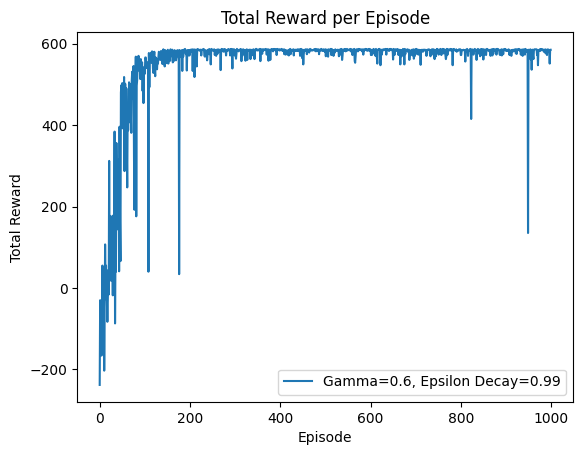

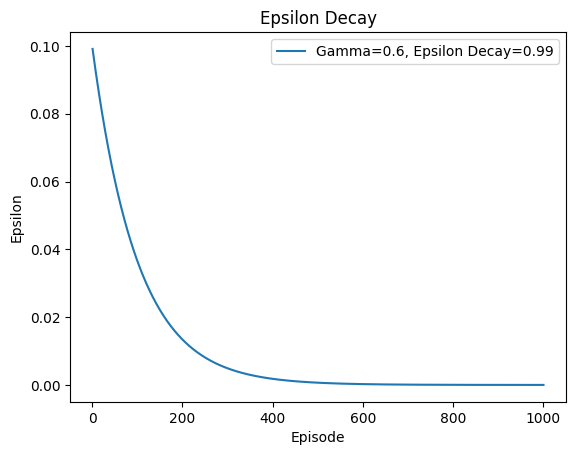

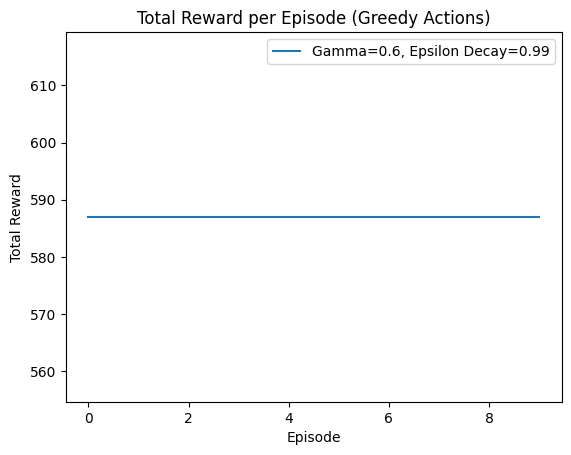


Initial Q-table for Gamma=0.6, Epsilon Decay=0.98:
Q1:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Q2:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Trained Q-table for Gamma=0.6, Epsilon Decay=0.98:
Q1:
[[-3.96430414 -5.19164432  2.4        -4.10597203]
 [ 1.6965058   0.71292658 14.         -3.80549281]
 [12.89767934 13.78015179 15.          2.05568737]
 [15.         15.         15.         14.        ]
 [-4.91224841 -4.07485103  0.72882087 -3.63456586]
 [-1.71711512 -2.28785661 13.90275437 -3.79896001]
 [13.26202224 12.75625288 15.          0.6006589 ]
 [15.         15.         15.         14.    

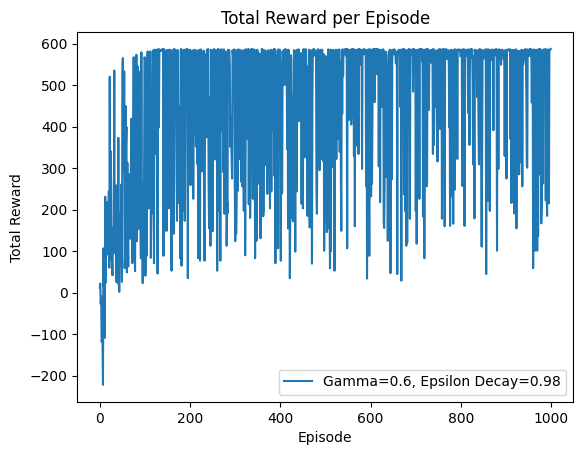

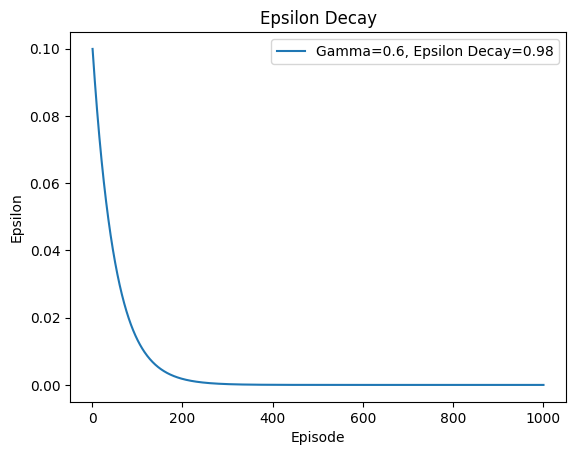

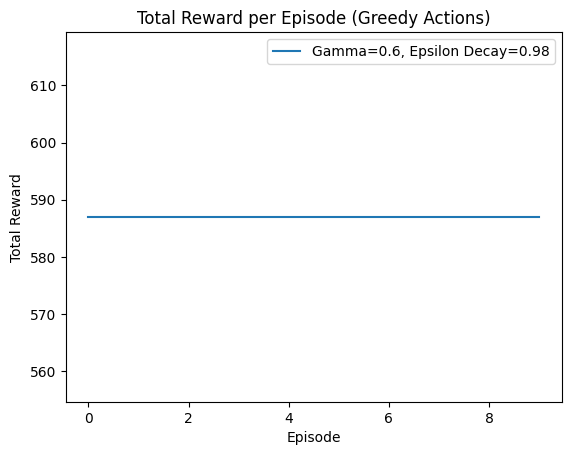


Initial Q-table for Gamma=0.7, Epsilon Decay=0.995:
Q1:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Q2:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Trained Q-table for Gamma=0.7, Epsilon Decay=0.995:
Q1:
[[-4.19311548e-01 -1.03010607e+00  7.30000000e+00 -5.01343925e-01]
 [ 7.19095829e+00  6.75262169e+00  1.90000000e+01 -7.88358619e-04]
 [ 1.89999905e+01  1.89999885e+01  2.00000000e+01  7.29999722e+00]
 [ 2.00000000e+01  2.00000000e+01  2.00000000e+01  1.90000000e+01]
 [-4.32614927e+00 -5.67956943e+00  6.43501559e+00 -4.25544638e+00]
 [ 4.77858275e+00  1.03250580e+00  1.89842827e+01 -3.44511042e+00

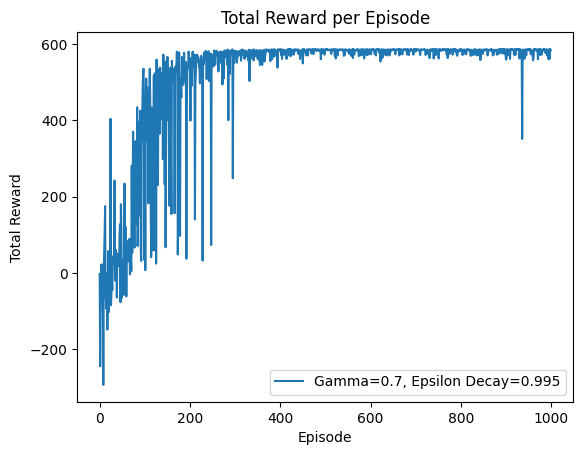

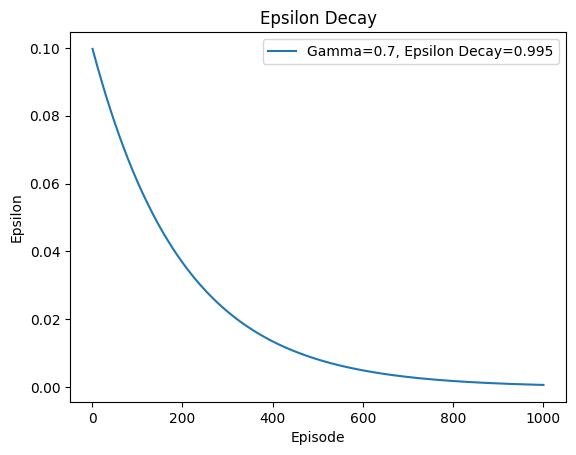

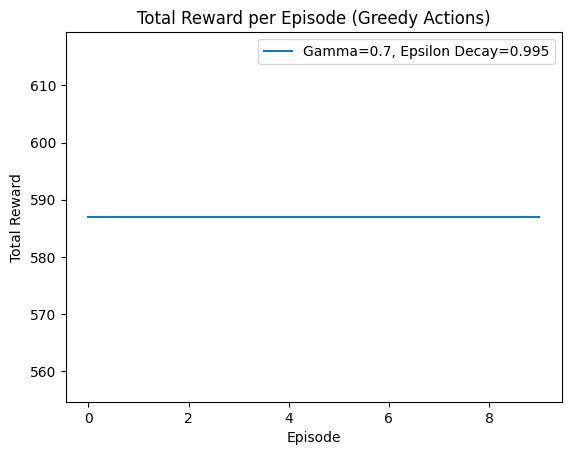


Initial Q-table for Gamma=0.7, Epsilon Decay=0.99:
Q1:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Q2:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Trained Q-table for Gamma=0.7, Epsilon Decay=0.99:
Q1:
[[-0.5136048  -2.87317785  7.3        -0.73731257]
 [ 6.7010325   5.59920728 19.         -0.9718591 ]
 [18.98971823 18.982542   20.          7.26079763]
 [20.         20.         20.         19.        ]
 [-3.28327917 -5.26497861  6.40087447 -3.75923201]
 [ 2.77453287 -2.0736275  18.95846557 -4.56141302]
 [18.99991074 17.37803209 20.          6.01948007]
 [20.         20.         20.         19.    

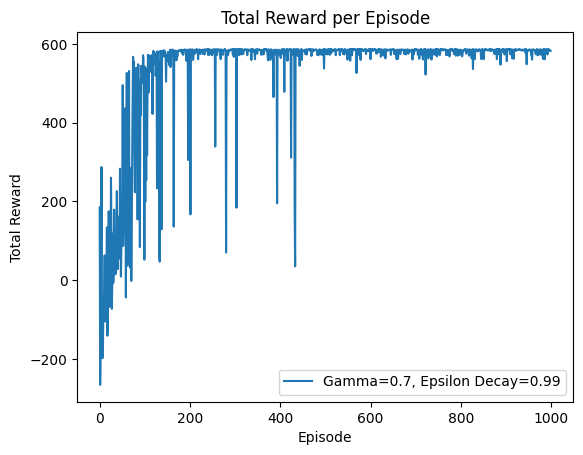

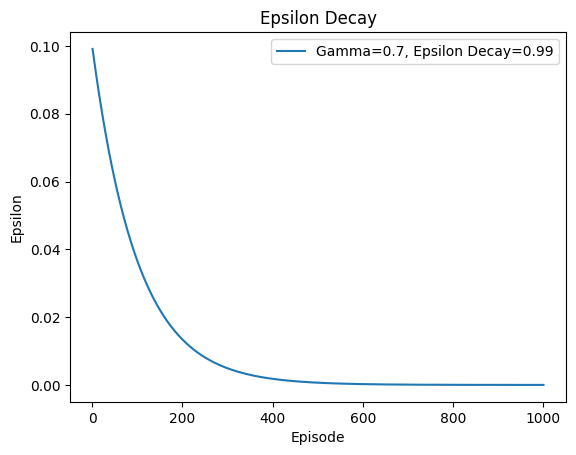

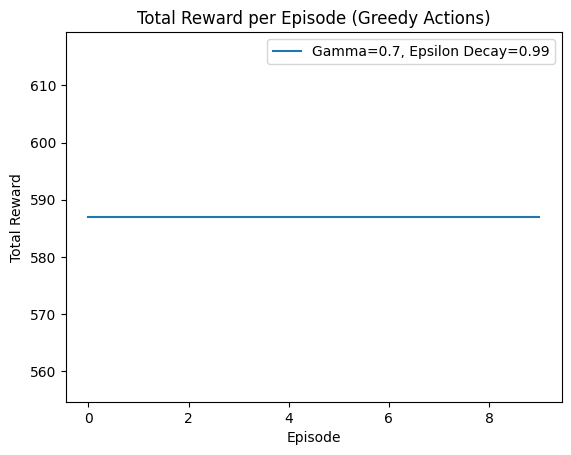


Initial Q-table for Gamma=0.7, Epsilon Decay=0.98:
Q1:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Q2:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Trained Q-table for Gamma=0.7, Epsilon Decay=0.98:
Q1:
[[-1.25246163 -3.97930098  7.3        -0.66258873]
 [ 4.76664301  1.7558734  19.         -1.01723295]
 [18.91853905 18.22809474 20.          7.24901058]
 [20.         20.         20.         19.        ]
 [-3.7293007  -4.25300984  4.46866028 -3.71389916]
 [ 1.7263245  -3.06481311 17.95586315 -2.85020825]
 [19.         13.73422989 13.86227106  2.8121156 ]
 [19.79425716 20.         19.44277658 17.9135

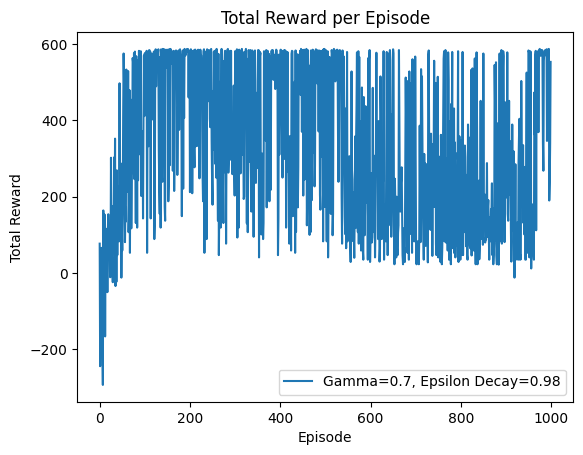

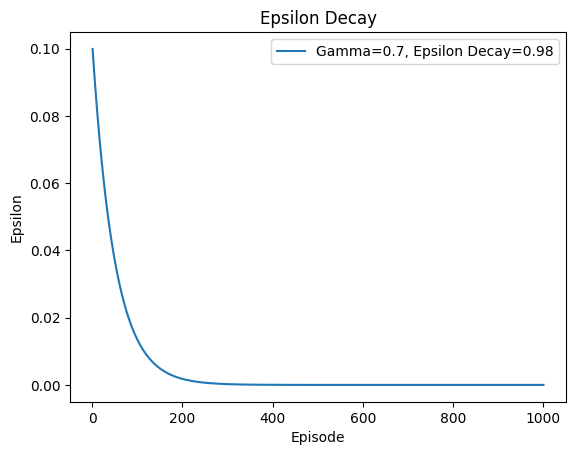

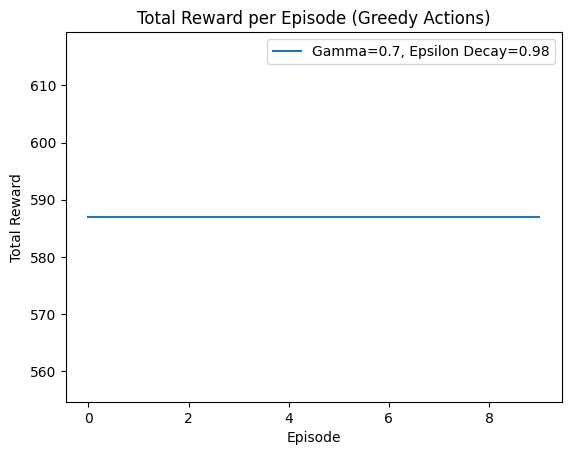

In [ ]:
#HYPERPARAMETERTUUNING
def hyperparametertuning(env, gamma_values, epsilon_decay_values):
    for i in gamma_values:
        for j in epsilon_decay_values:
            doubleqagent = DoubleQLearning(env, gamma=i, epsilon_decay=j)

            # Print initial q-table and we have 2 q tables
            print(f"\nInitial Q-table for Gamma={i}, Epsilon Decay={j}:")
            print("Q1:")
            print(doubleqagent.q1_table)
            print("Q2:")
            print(doubleqagent.q2_table)

            # here letus train the agent
            total_rewards = doubleqagent.train(num_episodes=1000, max_timesteps=100)
            d=len(total_rewards)
            episodes = range(1, d + 1)
            epsilon_values = [doubleqagent.epsilon * (doubleqagent.epsilon_decay ** (episode - 1)) for episode in episodes]

            # Print trained Q-table
            print(f"\nTrained Q-table for Gamma={i}, Epsilon Decay={j}:")
            print("Q1:")
            print(doubleqagent.q1_table)
            print("Q2:")
            print(doubleqagent.q2_table)

            # Plot total rewards per episode
            plt.plot(total_rewards, label=f"Gamma={i}, Epsilon Decay={j}")
            plt.title('Total Reward per Episode')
            plt.xlabel('Episode')
            plt.ylabel('Total Reward')
            plt.legend()
            plt.show()

            # Plotting for epsilon decay
            plt.plot(episodes, epsilon_values, label=f"Gamma={i}, Epsilon Decay={j}")
            plt.title('Epsilon Decay')
            plt.xlabel('Episode')
            plt.ylabel('Epsilon')
            plt.legend()
            plt.show()

            # Evaluate greedy rewards
            greedy_rewards = doubleqagent.evaluate_greedy(num_episodes=10)

            # here wewill plot  greedy rewards per episode
            plt.plot(greedy_rewards, label=f"Gamma={i}, Epsilon Decay={j}")
            plt.title('Total Reward per Episode (Greedy Actions)')
            plt.xlabel('Episode')
            plt.ylabel('Total Reward')
            plt.legend()
            plt.show()

# Hyperparameter tuning values
gamma_values = [0.4, 0.6, 0.7]
epsilon_decay_values = [0.995, 0.99, 0.98]

# Print and plot results for each set of hyperparameters
hyperparametertuning(env, gamma_values, epsilon_decay_values)


Comparsion graph


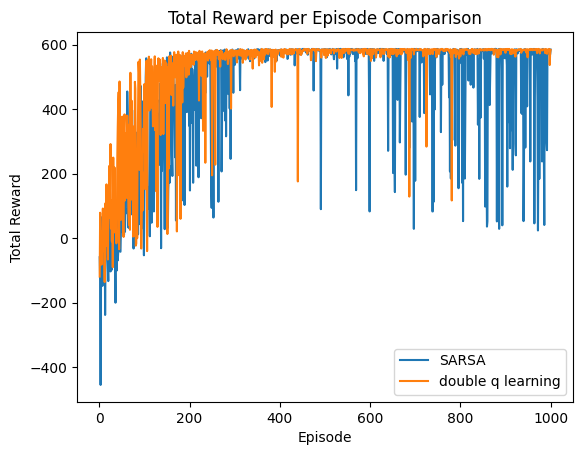

In [ ]:
plt.plot(episodes, sarsa_rewards, label='SARSA')
plt.plot(episodes, trained_rewards, label='double q learning')
plt.legend()
plt.title('Total Reward per Episode Comparison')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.show()
